**Upper bound confidence**

Importing libraries


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Importing libraries

In [2]:
dataset = pd.read_excel('/content/facebookads.xlsx')

**Implementation**

In [31]:
import math
T = 450   # Initially 15000
num_ads = 10
ads_selected = []

numbers_of_selections = [0] * num_ads
sums_of_rewards = [0] * num_ads
total_reward = 0

for n in range(T):
    ad = 0
    max_upper_confidence_bound = 0
    for i in range(num_ads):
        if numbers_of_selections[i] > 0:
            average_reward = sums_of_rewards[i] / numbers_of_selections[i]
            delta_i = math.sqrt(3 / 2 * math.log(n + 1) / numbers_of_selections[i])
            upper_bound = average_reward + delta_i
        else:
            upper_bound = float('inf')
        if upper_bound > max_upper_confidence_bound:
            max_upper_confidence_bound = upper_bound
            ad = i
    ads_selected.append(ad)
    numbers_of_selections[ad] += 1
    reward = dataset.values[n, ad]
    sums_of_rewards[ad] += reward
    total_reward += reward

**Histogram**

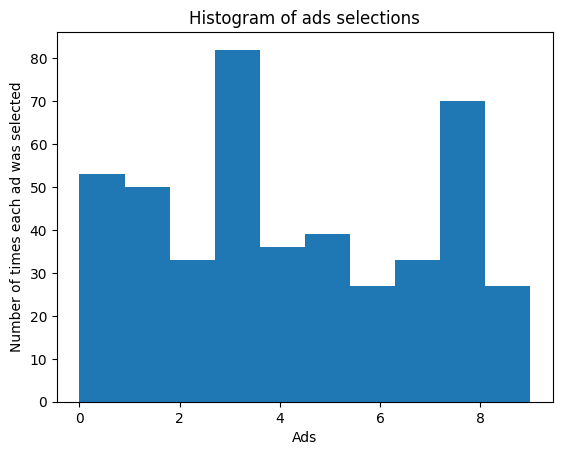

In [28]:
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()

**Thompson sampling algorithm**

Importing libraries

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Importing dataset

In [30]:
dataset = pd.read_excel('/content/facebookads.xlsx')

Implementation

In [46]:
import math
import random
T = 450
num_ads = 10
ads_selected = []

num_of_rewards_1 = [0] * num_ads
num_of_rewards_0 = [0] * num_ads
total_rewards = 0

for n in range(0, T):
    ad = 0
    max_random = 0
    for i in range(0, num_ads):
        random_beta = random.betavariate(num_of_rewards_1[i] + 1, num_of_rewards_0[i] + 1)
        if (random_beta > max_random):
            max_random = random_beta
            ad = i
        ads_selected.append(ad)
        reward = dataset.values[n, ad]
        if (reward == 1):
            num_of_rewards_1[ad] = num_of_rewards_1[ad] + 1
        else:
            num_of_rewards_0[ad] = num_of_rewards_0[ad] + 1
        total_rewards = total_rewards + reward

**Histogram**

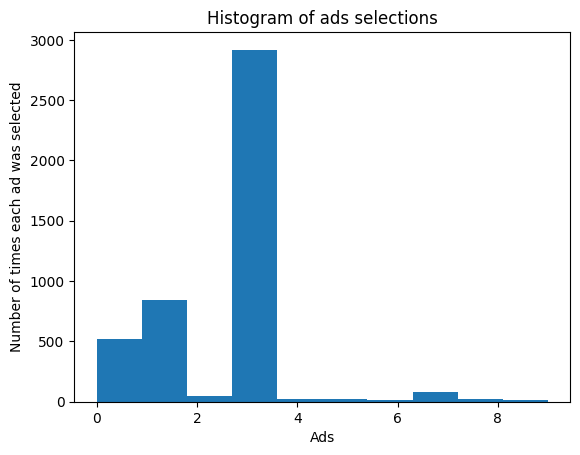

In [47]:
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()